# **ДОМАШНЕЕ ЗАДАНИЕ**

**ЗАДАЧА**

Визуализируйте корреляцию между 7 числовыми признаками, использованными для обучения модели, и залогируйте изображение в Comet.

**БИБЛИОТЕКИ**

In [8]:
# импорт библиотек
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import display
import logging
from comet_ml import Experiment

**НАЧАЛО ЭКСПЕРИМЕНТА**

In [6]:
# перезагрузка датафрейма
df = pd.read_csv('data/KaggleV2-May-2016.csv')

# создание эксперимента
experiment = Experiment(
    api_key="GahJ5CR64w0pqfgRkemOzX8UH",
    project_name="medical-appointment",
    workspace="royvudgren",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.com/royvudgren/medical-appointment/e92f8c0670b34a98937e0320640a532b



**ПОДГОТОВКА ДАННЫХ**

In [14]:
# перезагрузка датафрейма
df = pd.read_csv('data/KaggleV2-May-2016.csv')

# удаляем столбцы с айди (не участвующие в обучении)
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)
# удаляем выбросы по возрасту
df = df[(df.Age >= 0) & (df.Age <= 110)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Gender          110521 non-null  object
 1   ScheduledDay    110521 non-null  object
 2   AppointmentDay  110521 non-null  object
 3   Age             110521 non-null  int64 
 4   Neighbourhood   110521 non-null  object
 5   Scholarship     110521 non-null  int64 
 6   Hipertension    110521 non-null  int64 
 7   Diabetes        110521 non-null  int64 
 8   Alcoholism      110521 non-null  int64 
 9   Handcap         110521 non-null  int64 
 10  SMS_received    110521 non-null  int64 
 11  No-show         110521 non-null  object
dtypes: int64(7), object(5)
memory usage: 11.0+ MB


**МАТРИЦА КОРРЕЛЯЦИЙ**

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
Age,1.000000,-0.092437,0.504726,0.292509,0.095862,0.077369,0.012676
Scholarship,-0.092437,1.000000,-0.019731,-0.024899,0.035019,-0.008520,0.001188
Hipertension,0.504726,-0.019731,1.000000,0.433096,0.087972,0.080249,-0.006309
Diabetes,0.292509,-0.024899,0.433096,1.000000,0.018471,0.057629,-0.014555
Alcoholism,0.095862,0.035019,0.087972,0.018471,1.000000,0.004689,-0.026151
Handcap,0.077369,-0.008520,0.080249,0.057629,0.004689,1.000000,-0.024026
SMS_received,0.012676,0.001188,-0.006309,-0.014555,-0.026151,-0.024026,1.000000


{'web': 'https://www.comet.com/api/image/download?imageId=61c28b930c8942e088a845f0b5548f14&experimentKey=e92f8c0670b34a98937e0320640a532b',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=61c28b930c8942e088a845f0b5548f14&experimentKey=e92f8c0670b34a98937e0320640a532b',
 'imageId': '61c28b930c8942e088a845f0b5548f14'}

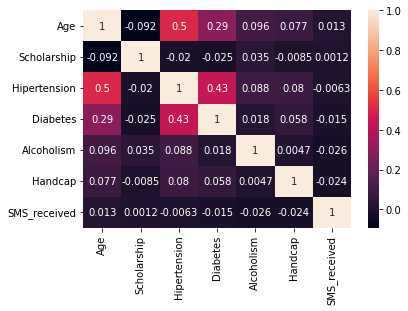

In [24]:
# матрица корреляций числовых признаков
display(df.corr())

# тепловая карта корреляций
ax = sns.heatmap(df.corr(), annot = True);
# логирование графика
experiment.log_figure('Heatmap_corr')

**КОМЕТ-ДИСПЛЕЙ**

In [26]:
experiment.display()

**КОНЕЦ ЭКСПЕРИМЕНТА**

In [25]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/royvudgren/medical-appointment/e92f8c0670b34a98937e0320640a532b
COMET INFO:   Uploads:
COMET INFO:     environment details : 1
COMET INFO:     figures             : 2
COMET INFO:     filename            : 1
COMET INFO:     git metadata        : 1
COMET INFO:     installed packages  : 1
COMET INFO:     notebook            : 1
COMET INFO:     source_code         : 1
COMET INFO: ---------------------------
COMET INFO: Uploading metrics, params, and assets to Comet before program termination (may take several seconds)
COMET INFO: The Python SDK has 3600 seconds to finish before aborting...
COMET INFO: Waiting for completion of the file uploads (may take several seconds)
COMET INFO: The Python SDK has 10800 seconds to finish before aborting...
COMET I